In [ ]:
"""
Features:

Demographic: Gender, Age, Height, Weight, family_history_with_overweight

Dietary:     FAVC (Frequent High Calorie Food), FCVC (Vegetable Consumption Frequency),
             NCP (Number of Daily Meals), CAEC (Consumption of Food Between Meals)
             
Lifestyle:   SMOKE (Smoking Habit), CH2O (Daily Water Intake), SCC (Calorie Monitoring),
             FAF (Physical Activity Frequency), TUE (Technological Device Usage Time),
             CALC (Alcohol Consumption Frequency), MTRANS (Main Mode of Transportation)
"""

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

pd.set_option("display.max_rows", 500) 
pd.set_option("display.max_columns", 100) 

# Data Loading  & EDA

## Train Data

In [14]:
df_train = pd.read_csv(r"C:\Users\NUR\Desktop\DTS02\ytu\data\train.csv")

In [15]:
df_train.tail(20)

,ID,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
1090,1091,20.986834,NaN,1.677178,80.379575,no,yes,2.000000,2.961706,no,no,2.000000,NaN,1.661556,1.114716,NaN,Public_Transportation,Overweight_Level_II
1091,1092,38.378056,Female,1.678050,NaN,no,yes,2.444599,3.000000,no,NaN,1.029798,yes,0.000000,0.000000,NaN,Automobile,Overweight_Level_II
1092,1093,NaN,NaN,1.717722,81.929910,Sometimes,yes,2.000000,1.152521,no,no,1.723159,yes,1.390160,NaN,Sometimes,Public_Transportation,Overweight_Level_II
1093,1094,21.082384,Female,1.486484,NaN,no,NaN,2.000000,1.104642,no,no,1.000000,yes,0.000000,0.969097,Sometimes,Public_Transportation,Overweight_Level_II
1094,1095,25.293202,Female,1.503379,NaN,no,no,2.000000,1.000000,no,no,1.639807,yes,0.072117,0.000000,Sometimes,NaN,Overweight_Level_II
1095,1096,NaN,Male,NaN,NaN,Sometimes,yes,2.000000,1.729553,no,no,1.400247,NaN,0.887923,1.011983,Sometimes,Public_Transportation,Overweight_Level_II
1096,1097,NaN,Female,1.688354,79.278896,no,NaN,3.000000,3.000000,no,NaN,2.994515,yes,0.000000,NaN,Sometimes,Automobile,Overweight_Level_II
1097,1098,34.044229,Female,1.665807,77.098973,no,NaN,2.976975,1.346987,no,no,1.868349,yes,0.702538,0.879333,NaN,Automobile,Overweight_Level_II
1098,1099,NaN,Male,NaN,97.029249,Sometimes,yes,2.000000,1.977221,no,NaN,3.000000,yes,1.000000,0.000000,Sometimes,Automobile,Overweight_Level_II
1099,1100,19.821996,Female,1.653431,NaN,Sometimes,no,2.766036,2.443812,no,no,2.707927,yes,0.702839,NaN,Sometimes,Public_Transportation,Overweight_Level_II


In [16]:
df_train.shape

(1110, 18)

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              1110 non-null   int64  
 1   Age                             801 non-null    float64
 2   Gender                          760 non-null    object 
 3   Height                          873 non-null    float64
 4   Weight                          753 non-null    float64
 5   CALC                            1056 non-null   object 
 6   FAVC                            609 non-null    object 
 7   FCVC                            1110 non-null   float64
 8   NCP                             1108 non-null   float64
 9   SCC                             1110 non-null   object 
 10  SMOKE                           777 non-null    object 
 11  CH2O                            1110 non-null   float64
 12  family_history_with_overweight  99

In [18]:
df_train.isnull().sum()

ID                                  0
Age                               309
Gender                            350
Height                            237
Weight                            357
CALC                               54
FAVC                              501
FCVC                                0
NCP                                 2
SCC                                 0
SMOKE                             333
CH2O                                0
family_history_with_overweight    120
FAF                                13
TUE                               215
CAEC                              320
MTRANS                            186
NObeyesdad                          0
dtype: int64

In [43]:
df_train["NObeyesdad"].value_counts()

NObeyesdad
Overweight_Level_I     290
Normal_Weight          287
Insufficient_Weight    272
Overweight_Level_II    191
Obesity_Type_I          47
Obesity_Type_III        12
Obesity_Type_II         11
Name: count, dtype: int64

In [ ]:
#SMOTE

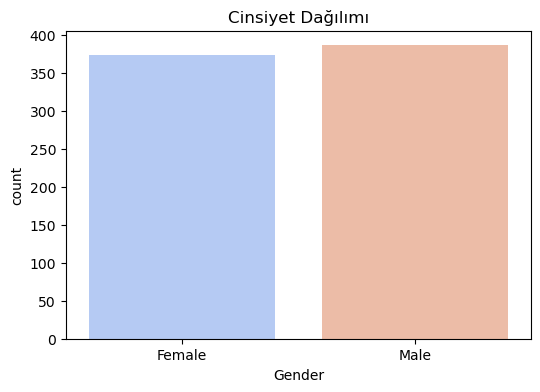

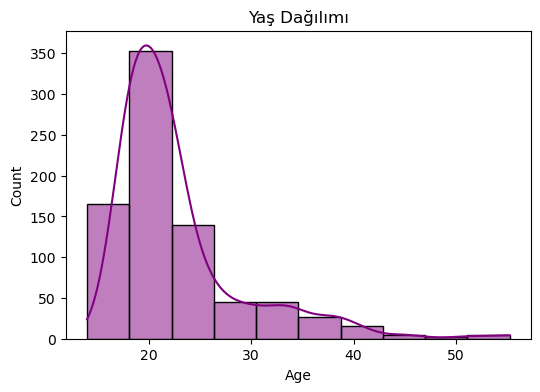

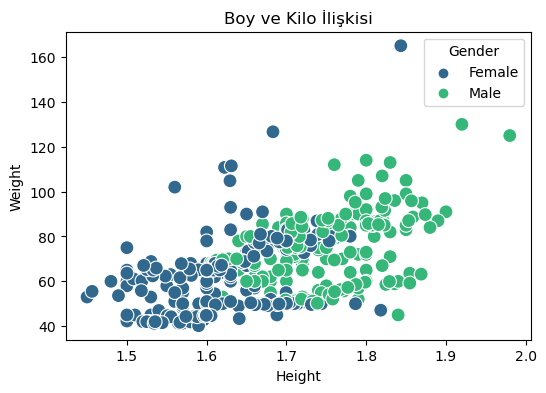

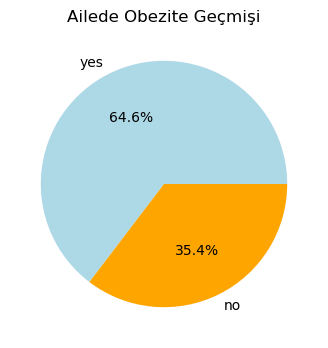

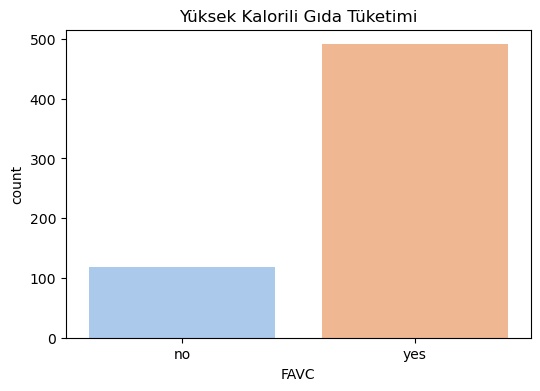

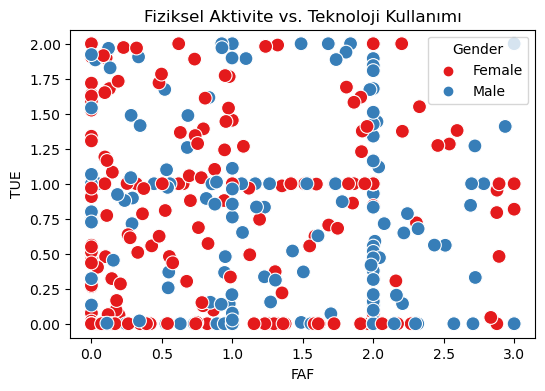

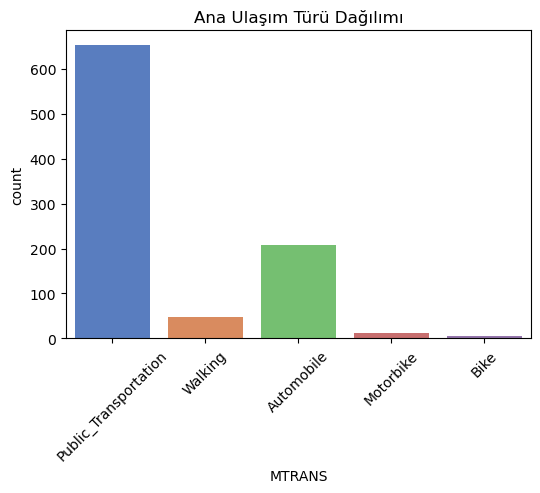

In [19]:

# Cinsiyet Dağılımı
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df_train, palette='coolwarm')
plt.title('Cinsiyet Dağılımı')
plt.show()

# Yaş Dağılımı
plt.figure(figsize=(6, 4))
sns.histplot(df_train['Age'], kde=True, bins=10, color='purple')
plt.title('Yaş Dağılımı')
plt.show()

# Boy ve Kilo İlişkisi
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=df_train, palette='viridis', s=100)
plt.title('Boy ve Kilo İlişkisi')
plt.show()

# Ailede Obezite Geçmişi
plt.figure(figsize=(6, 4))
df_train['family_history_with_overweight'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Ailede Obezite Geçmişi')
plt.ylabel('')
plt.show()

# Yüksek Kalorili Gıda Tüketimi
plt.figure(figsize=(6, 4))
sns.countplot(x='FAVC', data=df_train, palette='pastel')
plt.title('Yüksek Kalorili Gıda Tüketimi')
plt.show()

# Fiziksel Aktivite ve Teknoloji Kullanımı
plt.figure(figsize=(6, 4))
sns.scatterplot(x='FAF', y='TUE', hue='Gender', data=df_train, palette='Set1', s=100)
plt.title('Fiziksel Aktivite vs. Teknoloji Kullanımı')
plt.show()

# Ulaşım Türüne Göre Dağılım
plt.figure(figsize=(6, 4))
sns.countplot(x='MTRANS', data=df_train, palette='muted')
plt.title('Ana Ulaşım Türü Dağılımı')
plt.xticks(rotation=45)
plt.show()


In [20]:

# Sayısal değişkenler için Boxplot görselleştirmesi ve aykırı değer analizi
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
outliers = {}
for col in numeric_columns:
    Q1 = df_train[col].quantile(0.10)
    Q3 = df_train[col].quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)][col]

    # Boxplot görselleştirmesi
    fig = px.box(df_train, y=col, title=f'{col} Boxplot', template="plotly_dark")
    fig.show()

# Aykırı değerleri ekrana yazdırma
for col, values in outliers.items():
    print(f"{col} aykırı değerler:")
    print(values.to_list())
    print("-" * 30)


Age aykırı değerler:
[]
------------------------------
Height aykırı değerler:
[]
------------------------------
Weight aykırı değerler:
[165.057269]
------------------------------
FCVC aykırı değerler:
[]
------------------------------
NCP aykırı değerler:
[]
------------------------------
CH2O aykırı değerler:
[]
------------------------------
FAF aykırı değerler:
[]
------------------------------
TUE aykırı değerler:
[]
------------------------------


## Test Data

In [21]:
df_test = pd.read_csv(r"C:\Users\NUR\Desktop\DTS02\ytu\data\test.csv")

In [22]:
df_test.head()

,ID,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,1111,NaN,NaN,1.708800,83.520113,Sometimes,yes,2.689577,2.714115,no,no,2.279214,NaN,0.970661,0.828549,Sometimes,Public_Transportation
1,1112,NaN,Male,1.680991,79.752916,NaN,yes,NaN,2.521546,no,no,1.985312,yes,0.007050,NaN,NaN,Public_Transportation
2,1113,27.349745,Male,1.835271,97.588260,Sometimes,yes,2.923433,1.338033,no,no,1.944095,yes,1.931829,1.000000,Sometimes,Public_Transportation
3,1114,18.000000,Male,NaN,86.565148,Sometimes,yes,3.000000,3.000000,NaN,no,2.000000,NaN,2.040816,NaN,Sometimes,Public_Transportation
4,1115,33.009285,Male,1.741192,84.773349,no,yes,2.000000,3.000000,NaN,no,2.035954,yes,1.210736,0.000000,Sometimes,Automobile


In [23]:
df_test.shape

(1001, 17)

In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              1001 non-null   int64  
 1   Age                             721 non-null    float64
 2   Gender                          662 non-null    object 
 3   Height                          781 non-null    float64
 4   Weight                          684 non-null    float64
 5   CALC                            933 non-null    object 
 6   FAVC                            1001 non-null   object 
 7   FCVC                            859 non-null    float64
 8   NCP                             1001 non-null   float64
 9   SCC                             668 non-null    object 
 10  SMOKE                           1001 non-null   object 
 11  CH2O                            916 non-null    float64
 12  family_history_with_overweight  87

In [25]:
df_test.isnull().sum()

ID                                  0
Age                               280
Gender                            339
Height                            220
Weight                            317
CALC                               68
FAVC                                0
FCVC                              142
NCP                                 0
SCC                               333
SMOKE                               0
CH2O                               85
family_history_with_overweight    125
FAF                                10
TUE                               217
CAEC                              285
MTRANS                            176
dtype: int64

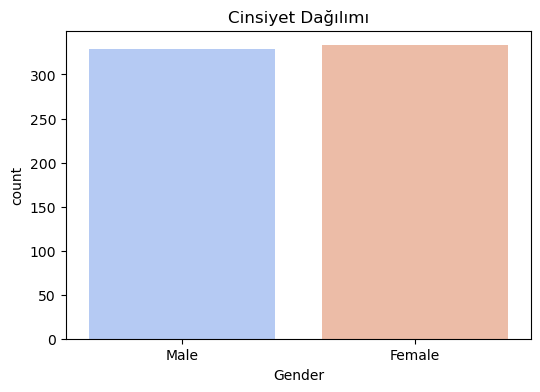

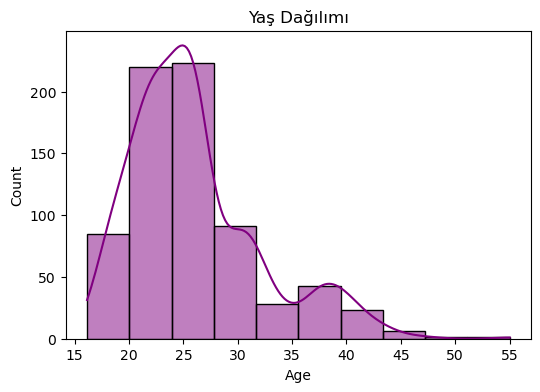

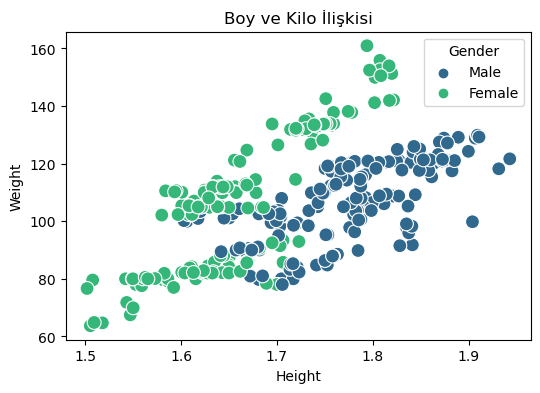

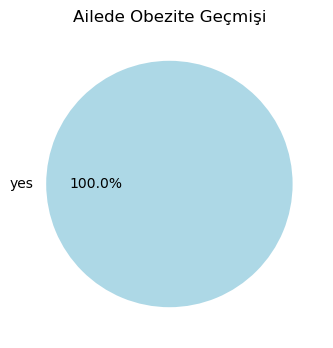

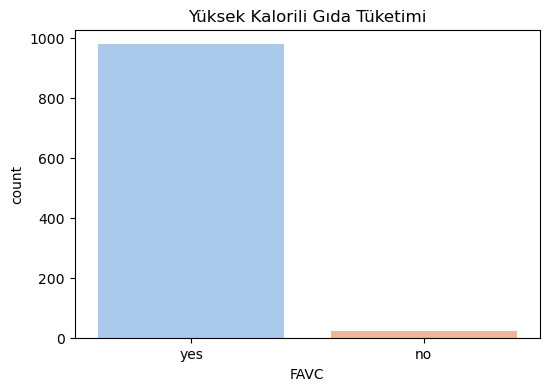

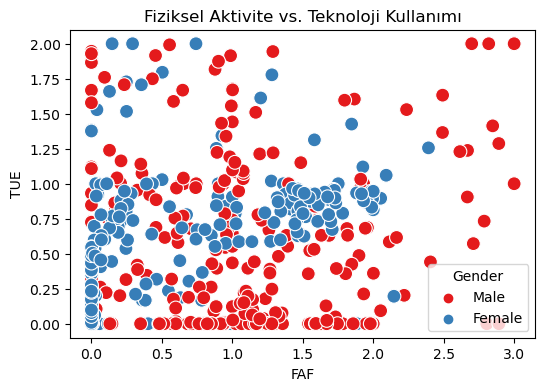

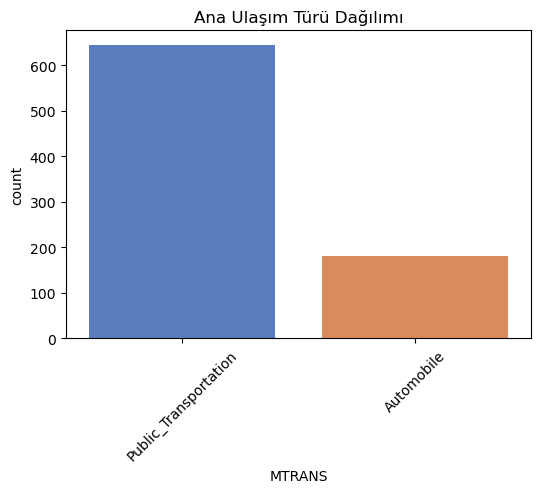

In [26]:

# Cinsiyet Dağılımı
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df_test, palette='coolwarm')
plt.title('Cinsiyet Dağılımı')
plt.show()

# Yaş Dağılımı
plt.figure(figsize=(6, 4))
sns.histplot(df_test['Age'], kde=True, bins=10, color='purple')
plt.title('Yaş Dağılımı')
plt.show()

# Boy ve Kilo İlişkisi
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=df_test, palette='viridis', s=100)
plt.title('Boy ve Kilo İlişkisi')
plt.show()

# Ailede Obezite Geçmişi
plt.figure(figsize=(6, 4))
df_test['family_history_with_overweight'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Ailede Obezite Geçmişi')
plt.ylabel('')
plt.show()

# Yüksek Kalorili Gıda Tüketimi
plt.figure(figsize=(6, 4))
sns.countplot(x='FAVC', data=df_test, palette='pastel')
plt.title('Yüksek Kalorili Gıda Tüketimi')
plt.show()

# Fiziksel Aktivite ve Teknoloji Kullanımı
plt.figure(figsize=(6, 4))
sns.scatterplot(x='FAF', y='TUE', hue='Gender', data=df_test, palette='Set1', s=100)
plt.title('Fiziksel Aktivite vs. Teknoloji Kullanımı')
plt.show()

# Ulaşım Türüne Göre Dağılım
plt.figure(figsize=(6, 4))
sns.countplot(x='MTRANS', data=df_test, palette='muted')
plt.title('Ana Ulaşım Türü Dağılımı')
plt.xticks(rotation=45)
plt.show()


In [28]:

# Sayısal değişkenler için Boxplot görselleştirmesi ve aykırı değer analizi
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
outliers = {}
for col in numeric_columns:
    Q1 = df_test[col].quantile(0.10)
    Q3 = df_test[col].quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df_test[(df_test[col] < lower_bound) | (df_test[col] > upper_bound)][col]

    # Boxplot görselleştirmesi
    fig = px.box(df_test, y=col, title=f'{col} Boxplot', template="plotly_dark")
    fig.show()

# Aykırı değerleri ekrana yazdırma
for col, values in outliers.items():
    print(f"{col} aykırı değerler:")
    print(values.to_list())
    print("-" * 30)


Age aykırı değerler:
[]
------------------------------
Height aykırı değerler:
[]
------------------------------
Weight aykırı değerler:
[]
------------------------------
FCVC aykırı değerler:
[]
------------------------------
NCP aykırı değerler:
[]
------------------------------
CH2O aykırı değerler:
[]
------------------------------
FAF aykırı değerler:
[]
------------------------------
TUE aykırı değerler:
[]
------------------------------


In [ ]:
df_train

## Sample Data

In [29]:
sample = pd.read_csv(r"C:\Users\NUR\Desktop\DTS02\ytu\data\sample_submission.csv")

In [30]:
sample.shape

(1001, 2)

In [31]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1001 non-null   int64 
 1   NObeyesdad  1001 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [39]:
sample.head()

,ID,NObeyesdad
0,1111,Normal_Weight
1,1112,Normal_Weight
2,1113,Normal_Weight
3,1114,Overweight_Level_I
4,1115,Overweight_Level_II


# Feature Engineering &  Modeling 

In [32]:

# Sayısal değişkenler için Boxplot görselleştirmesi ve aykırı değer analizi
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
outliers = {}
for col in numeric_columns:
    Q1 = df_train[col].quantile(0.10)
    Q3 = df_train[col].quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)][col]
    
    # Aykırı değerleri lower_bound veya upper_bound ile eşitleme
    df_train[col] = df_train[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    # Boxplot görselleştirmesi
    fig = px.box(df_train, y=col, title=f'{col} Boxplot', template="plotly_dark")
    fig.show()



In [33]:
df_train.head()

,ID,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,1,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,2,21.0,NaN,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,NaN,Sometimes,Public_Transportation,Normal_Weight
2,3,NaN,Male,NaN,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,NaN,Sometimes,Public_Transportation,Normal_Weight
3,4,27.0,NaN,NaN,87.0,Frequently,no,3.0,3.0,no,NaN,2.0,NaN,2.0,0.0,NaN,Walking,Overweight_Level_I
4,5,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [34]:


# Kategorik değişkenlerde eksik değerleri oranlara göre doldurma
categorical_columns = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
for col in categorical_columns:
    mode_values = df_train[col].dropna().value_counts(normalize=True)
    df_train[col].fillna(pd.Series(pd.NA if mode_values.empty else 
                                mode_values.sample(1, weights=mode_values.values).index[0], 
                                index=df_train.index), inplace=True)

# Sayısal değişkenlerde eksik değerleri medyan ile doldurma
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df_train[numeric_columns] = df_train[numeric_columns].apply(lambda x: x.fillna(x.median()))



In [35]:

# Sayısal değişkenler için Boxplot görselleştirmesi ve aykırı değer analizi
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
outliers = {}
for col in numeric_columns:
    Q1 = df_test[col].quantile(0.10)
    Q3 = df_test[col].quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df_test[(df_test[col] < lower_bound) | (df_test[col] > upper_bound)][col]
    
    # Aykırı değerleri lower_bound veya upper_bound ile eşitleme
    df_test[col] = df_test[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    # Boxplot görselleştirmesi
    fig = px.box(df_test, y=col, title=f'{col} Boxplot', template="plotly_dark")
    fig.show()



In [36]:


# Kategorik değişkenlerde eksik değerleri oranlara göre doldurma
categorical_columns = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
for col in categorical_columns:
    mode_values = df_test[col].dropna().value_counts(normalize=True)
    df_test[col].fillna(pd.Series(pd.NA if mode_values.empty else 
                                mode_values.sample(1, weights=mode_values.values).index[0], 
                                index=df_test.index), inplace=True)

# Sayısal değişkenlerde eksik değerleri medyan ile doldurma
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df_test[numeric_columns] = df_test[numeric_columns].apply(lambda x: x.fillna(x.median()))



In [37]:

# BMI hesaplama: BMI = Weight (kg) / Height (m)^2
df_train['BMI'] = df_train['Weight'] / (df_train['Height'] ** 2)

# Öğün sıklığı: NCP (3 ve üzeri yüksek, altı düşük)
df_train['Meal_Frequency'] = df_train['NCP'].apply(lambda x: 'High Meal Frequency' if x >= 3 else 'Low Meal Frequency')

# Su tüketim durumu: CH2O 2 litre ve üzeri yüksek, altı düşük
df_train['Hydration_Level'] = df_train['CH2O'].apply(lambda x: 'High Hydration' if x >= 2 else 'Low Hydration')

# Aktivite seviyesi: FAF (Frequenct => Active, Sometimes => Moderate, diğerleri => Inactive)
df_train['Activity_Level'] = df_train['FAF'].apply(lambda x: 'Active' if x == 'Frequently' else ('Moderate' if x == 'Sometimes' else 'Inactive'))

# Teknoloji kullanım seviyesi: TUE (5 saat ve üzeri High, altı Low)
df_train['Technology_Use_Level'] = df_train['TUE'].apply(lambda x: 'High Technology Use' if x >= 5 else 'Low Technology Use')

# Alkol tüketim seviyesi: CALC (Frequently => High, Sometimes => Moderate, No => Low)
df_train['Alcohol_Consumption_Level'] = df_train['CALC'].apply(lambda x: 'High Alcohol Consumption' if x == 'Frequently' else ('Moderate Alcohol Consumption' if x == 'Sometimes' else 'Low Alcohol Consumption'))

# Sonuçları görüntüleme
df_train.head()


,ID,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,BMI,Meal_Frequency,Hydration_Level,Activity_Level,Technology_Use_Level,Alcohol_Consumption_Level
0,1,21.0,Female,1.620000,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.000000,Sometimes,Public_Transportation,Normal_Weight,24.386526,High Meal Frequency,High Hydration,Inactive,Low Technology Use,Low Alcohol Consumption
1,2,21.0,Male,1.520000,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.773087,Sometimes,Public_Transportation,Normal_Weight,24.238227,High Meal Frequency,High Hydration,Inactive,Low Technology Use,Moderate Alcohol Consumption
2,3,21.0,Male,1.691303,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,0.773087,Sometimes,Public_Transportation,Normal_Weight,26.918316,High Meal Frequency,High Hydration,Inactive,Low Technology Use,High Alcohol Consumption
3,4,27.0,Male,1.691303,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.000000,Sometimes,Walking,Overweight_Level_I,30.414201,High Meal Frequency,High Hydration,Inactive,Low Technology Use,High Alcohol Consumption
4,5,22.0,Male,1.780000,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,Low Meal Frequency,High Hydration,Inactive,Low Technology Use,Moderate Alcohol Consumption


In [38]:

# BMI hesaplama: BMI = Weight (kg) / Height (m)^2
df_test['BMI'] = df_test['Weight'] / (df_test['Height'] ** 2)

# Öğün sıklığı: NCP (3 ve üzeri yüksek, altı düşük)
df_test['Meal_Frequency'] = df_test['NCP'].apply(lambda x: 'High Meal Frequency' if x >= 3 else 'Low Meal Frequency')

# Su tüketim durumu: CH2O 2 litre ve üzeri yüksek, altı düşük
df_test['Hydration_Level'] = df_test['CH2O'].apply(lambda x: 'High Hydration' if x >= 2 else 'Low Hydration')

# Aktivite seviyesi: FAF (Frequenct => Active, Sometimes => Moderate, diğerleri => Inactive)
df_test['Activity_Level'] = df_test['FAF'].apply(lambda x: 'Active' if x == 'Frequently' else ('Moderate' if x == 'Sometimes' else 'Inactive'))

# Teknoloji kullanım seviyesi: TUE (5 saat ve üzeri High, altı Low)
df_test['Technology_Use_Level'] = df_test['TUE'].apply(lambda x: 'High Technology Use' if x >= 5 else 'Low Technology Use')

# Alkol tüketim seviyesi: CALC (Frequently => High, Sometimes => Moderate, No => Low)
df_test['Alcohol_Consumption_Level'] = df_test['CALC'].apply(lambda x: 'High Alcohol Consumption' if x == 'Frequently' else ('Moderate Alcohol Consumption' if x == 'Sometimes' else 'Low Alcohol Consumption'))

# Sonuçları görüntüleme
df_test.head()


,ID,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,BMI,Meal_Frequency,Hydration_Level,Activity_Level,Technology_Use_Level,Alcohol_Consumption_Level
0,1111,25.314589,Male,1.708800,83.520113,Sometimes,yes,2.689577,2.714115,no,no,2.279214,yes,0.970661,0.828549,Sometimes,Public_Transportation,28.602804,Low Meal Frequency,High Hydration,Inactive,Low Technology Use,Moderate Alcohol Consumption
1,1112,25.314589,Male,1.680991,79.752916,Sometimes,yes,2.667676,2.521546,no,no,1.985312,yes,0.007050,0.584102,Sometimes,Public_Transportation,28.223820,Low Meal Frequency,Low Hydration,Inactive,Low Technology Use,Moderate Alcohol Consumption
2,1113,27.349745,Male,1.835271,97.588260,Sometimes,yes,2.923433,1.338033,no,no,1.944095,yes,1.931829,1.000000,Sometimes,Public_Transportation,28.973247,Low Meal Frequency,Low Hydration,Inactive,Low Technology Use,Moderate Alcohol Consumption
3,1114,18.000000,Male,1.719780,86.565148,Sometimes,yes,3.000000,3.000000,no,no,2.000000,yes,2.040816,0.584102,Sometimes,Public_Transportation,29.268286,High Meal Frequency,High Hydration,Inactive,Low Technology Use,Moderate Alcohol Consumption
4,1115,33.009285,Male,1.741192,84.773349,no,yes,2.000000,3.000000,no,no,2.035954,yes,1.210736,0.000000,Sometimes,Automobile,27.961857,High Meal Frequency,High Hydration,Inactive,Low Technology Use,Low Alcohol Consumption


Training Logistic Regression...
Logistic Regression Recall: 0.0539
Confusion Matrix for Logistic Regression:
[[  0   0  24  35  76   2 135]
 [  0   1  14  20  18  10 224]
 [  0   0   3   3   3   5  33]
 [  0   0   1   0   0   0  10]
 [  0   0   2   0   3   0   7]
 [  0   0   2   3 235   2  48]
 [  0   0   2   2  27   6  45]]


C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



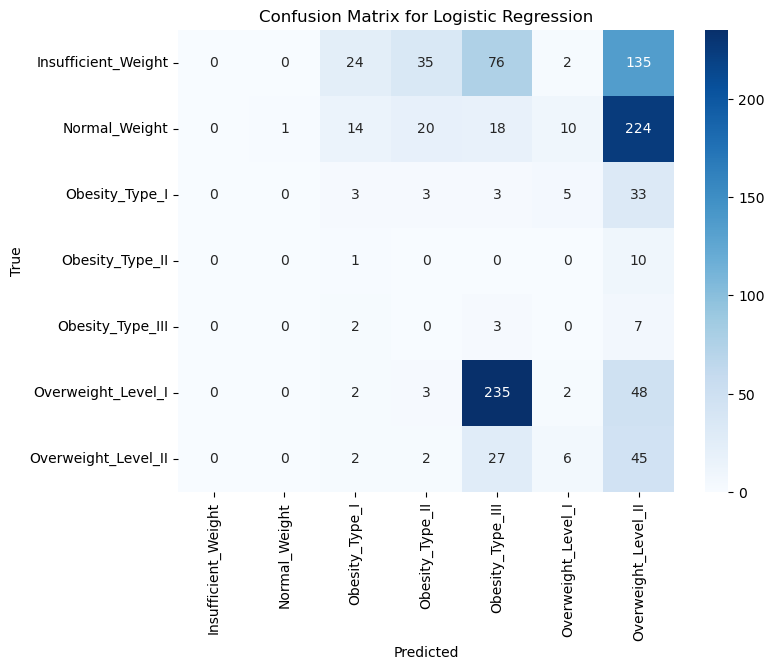

Training Random Forest...


C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Random Forest Recall: 0.0549
Confusion Matrix for Random Forest:
[[  0   0  24  25  76   4 143]
 [  0   1  68  15  21   7 175]
 [  0   0  11   2   2   3  29]
 [  0   0   1   1   0   0   9]
 [  0   0   2   1   2   0   7]
 [  0   0  19   2 233   2  34]
 [  0   1  12   2  26   3  38]]


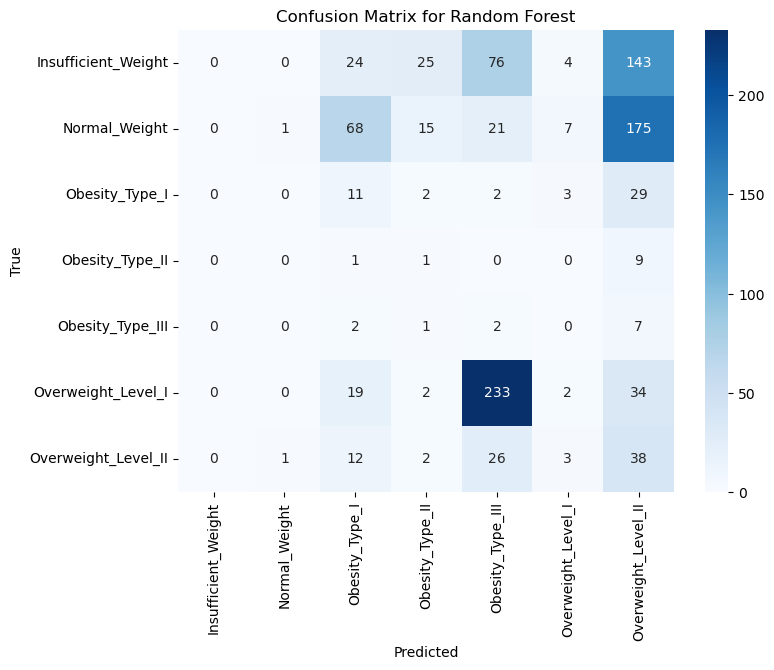

Training KNN...
KNN Recall: 0.0589
Confusion Matrix for KNN:
[[  0   0  30  32  97  23  90]
 [  0   2  48   9  38  35 155]
 [  0   1  12   2   9  10  13]
 [  0   0   2   0   0   2   7]
 [  0   0   3   3   2   1   3]
 [  0   0  16   6 219  12  37]
 [  0   1   8   3  28  11  31]]


C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



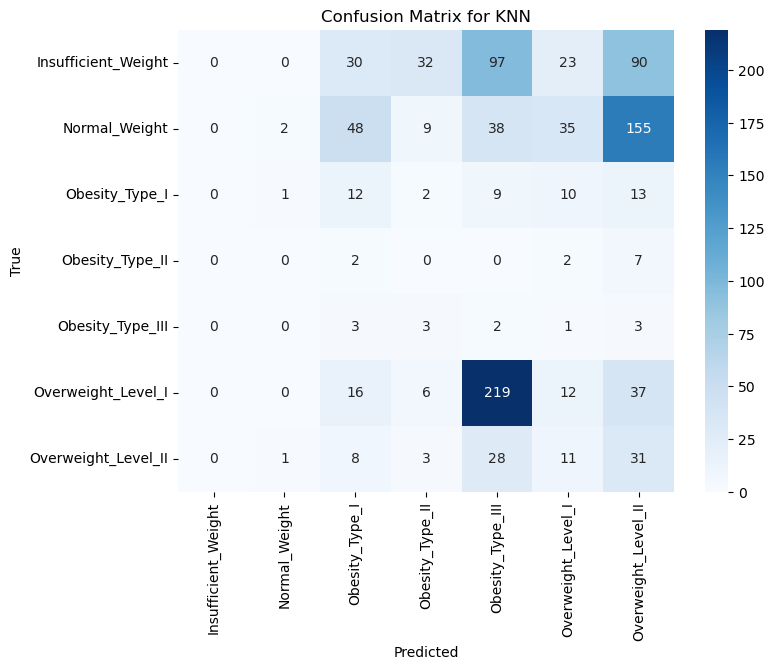

Training SVM...


C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



SVM Recall: 0.0569
Confusion Matrix for SVM:
[[  0   0 101  20  73   2  76]
 [  0   1 103   9  18   7 149]
 [  0   0  19   1   4   6  17]
 [  0   0   4   0   0   0   7]
 [  0   0   6   0   1   0   5]
 [  0   0  32   0 220   2  36]
 [  0   1  19   0  25   3  34]]


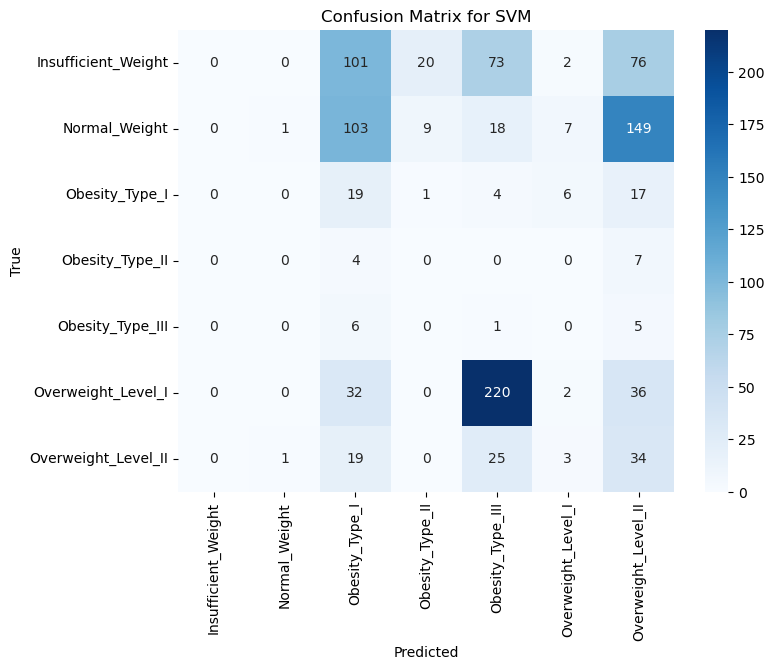

Training XGBoost...


C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



XGBoost Recall: 0.0390
Confusion Matrix for XGBoost:
[[  0   0  61 156  42   3  10]
 [  0   1 115  76  24   5  66]
 [  0   0  16  16   2   1  12]
 [  0   0   4   5   0   0   2]
 [  0   0   5   7   0   0   0]
 [  0   0  40  81 158   2   9]
 [  0   1  24  21  20   1  15]]


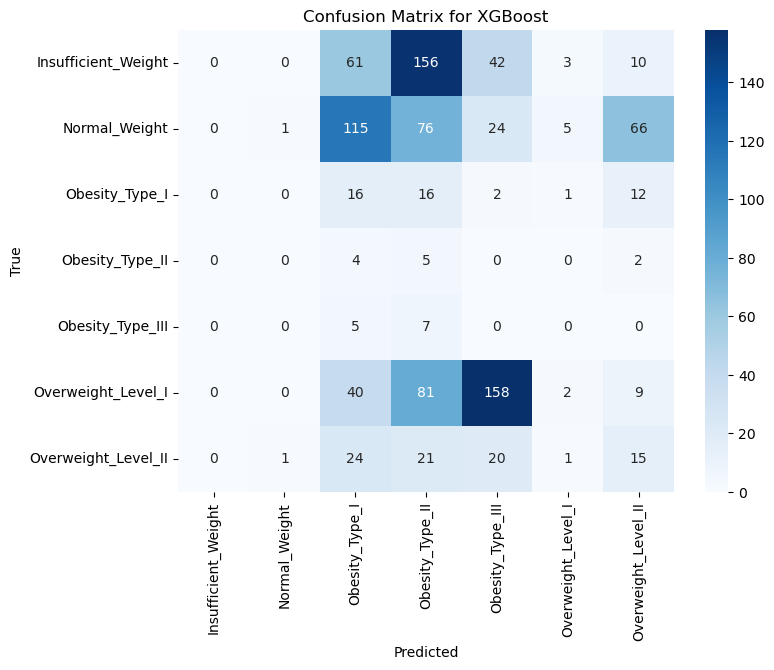

Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2195
[LightGBM] [Info] Number of data points in the train set: 1110, number of used features: 25
[LightGBM] [Info] Start training from score -1.406313
[LightGBM] [Info] Start training from score -1.352633
[LightGBM] [Info] Start training from score -3.161968
[LightGBM] [Info] Start training from score -4.614220
[LightGBM] [Info] Start training from score -4.527209
[LightGBM] [Info] Start training from score -1.342234
[LightGBM] [Info] Start training from score -1.759842
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

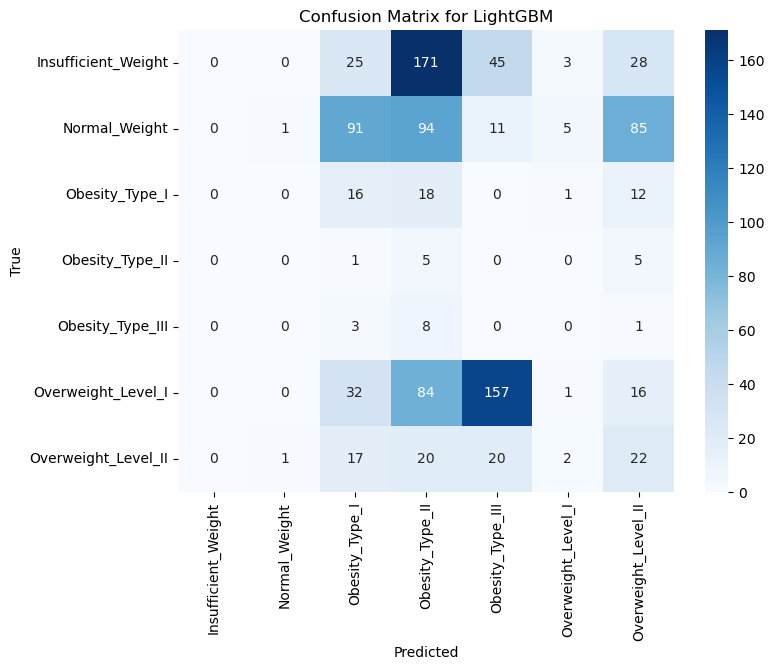

In [40]:


# Modelleri tanımla
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

# Kategorik değişkenler
categorical_columns = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS','Meal_Frequency', 'Hydration_Level',
       'Activity_Level', 'Technology_Use_Level', 'Alcohol_Consumption_Level']

# Numerik değişkenler
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

# OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' ile referans kategoriyi düşür

# StandardScaler
scaler = StandardScaler()

# Kolonları dönüştürmek için pipeline oluştur
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_columns),  # Kategorik özellikler
        ('num', scaler, numeric_columns)  # Numerik özellikler
    ],
    remainder='passthrough'  # Kategorik olmayan kolonları olduğu gibi bırak
)

# LabelEncoder (sınıf etiketlerini sayısallaştırmak için)
label_encoder = LabelEncoder()

# Eğitim ve test verilerini hazırlama
X_train = df_train.drop(['NObeyesdad', 'ID'], axis=1)
y_train = label_encoder.fit_transform(df_train['NObeyesdad'])

X_test = df_test.drop(['ID'], axis=1)
y_test = label_encoder.transform(sample['NObeyesdad'])

# Her model için recall ve confusion matrix hesapla
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Modeli eğit
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Modeli eğit
    model_pipeline.fit(X_train, y_train)
    
    # Test seti ile tahmin yap
    y_pred = model_pipeline.predict(X_test)
    
    # Recall hesapla
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"{model_name} Recall: {recall:.4f}")
    
    # Confusion Matrix hesapla
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    
    # Confusion Matrix'i görselleştir
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


Feature Importance for Random Forest...


C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



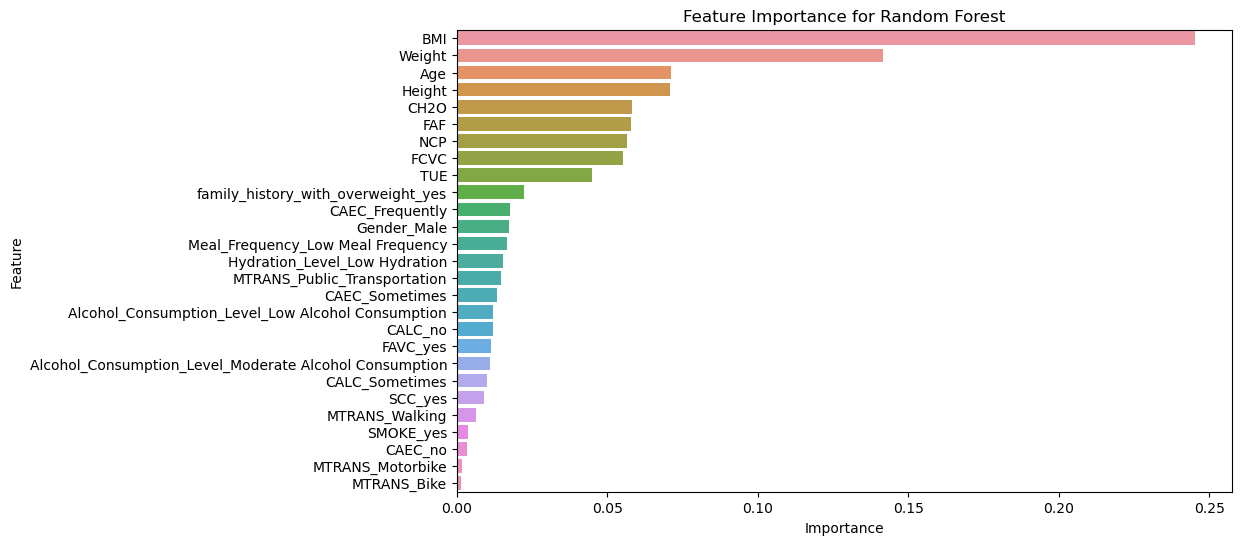

Feature Importance for XGBoost...


C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



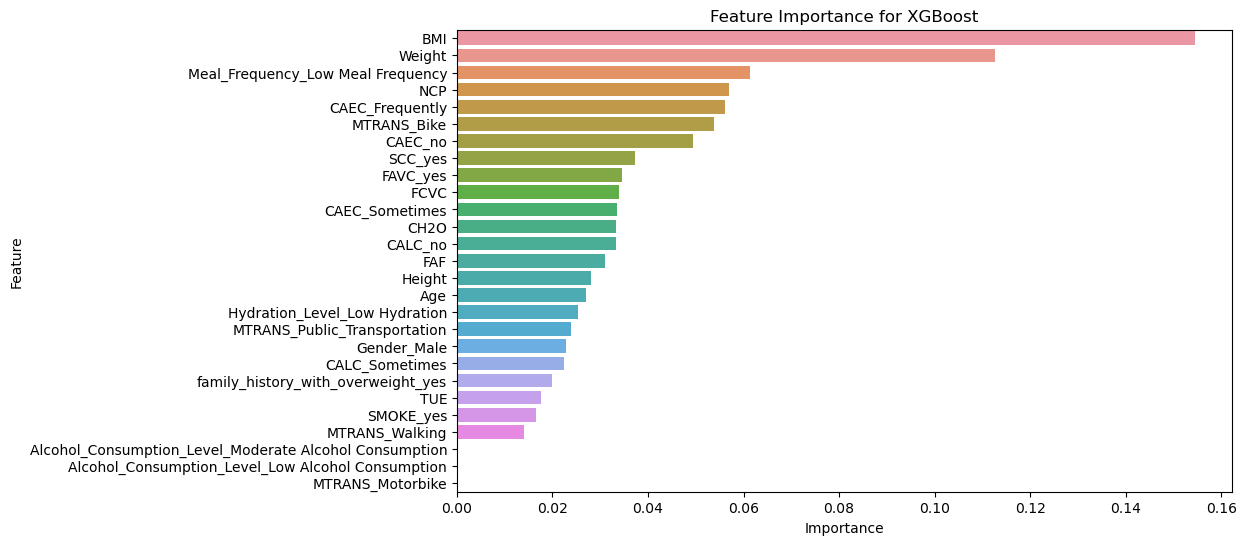

Feature Importance for LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2195
[LightGBM] [Info] Number of data points in the train set: 1110, number of used features: 25
[LightGBM] [Info] Start training from score -1.406313
[LightGBM] [Info] Start training from score -1.352633
[LightGBM] [Info] Start training from score -3.161968
[LightGBM] [Info] Start training from score -4.614220
[LightGBM] [Info] Start training from score -4.527209
[LightGBM] [Info] Start training from score -1.342234
[LightGBM] [Info] Start training from score -1.759842
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

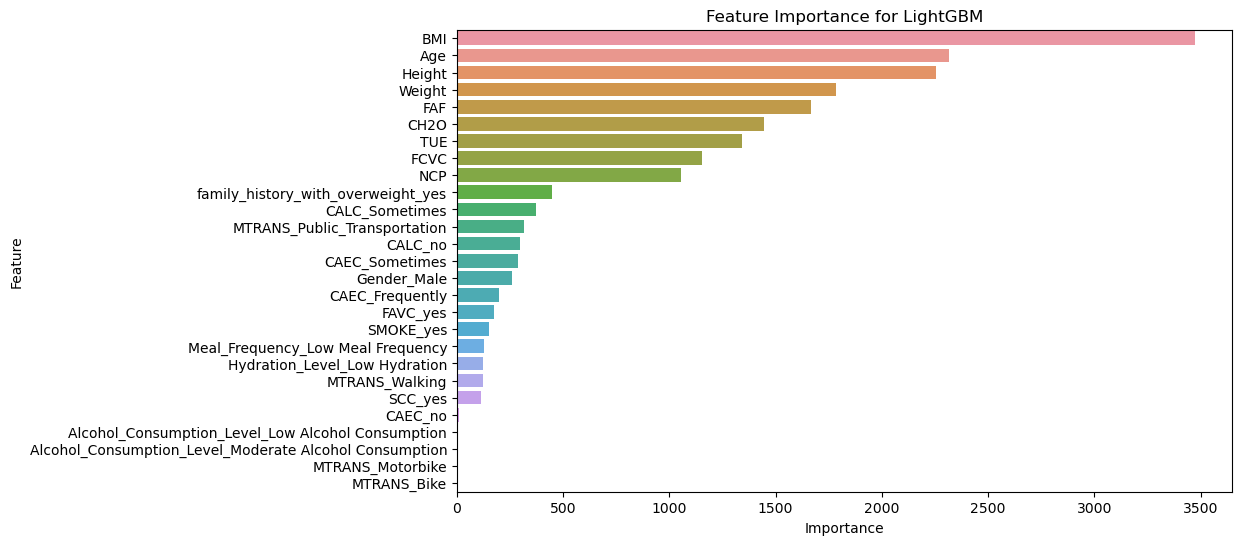

In [41]:
# Feature Importance Görselleştirme
for model_name, model in models.items():
    if model_name in ['Random Forest', 'XGBoost', 'LightGBM']:
        print(f"Feature Importance for {model_name}...")

        # Modeli tekrar eğit
        model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        
        # OneHotEncoder'ı fit et
        preprocessor.fit(X_train)  # Burada encoder'ı fit ediyoruz
        
        # Modeli eğit
        model_pipeline.fit(X_train, y_train)
        
        # Feature importance'ı al
        importance = model_pipeline.named_steps['classifier'].feature_importances_
        
        # OneHotEncoder'dan gelen kategorik özellik isimlerini al
        feature_names = preprocessor.transformers_[0][1].get_feature_names_out(categorical_columns)  # OneHotEncoder'dan gelen özellik isimleri
        feature_names = np.append(feature_names, X_train.select_dtypes(include=[np.number]).columns)  # Sayısal sütunlar

        # Feature importance'ı görselleştir
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importance
        })
        
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        
        # Görselleştirme
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title(f"Feature Importance for {model_name}")
        plt.show()


# Hiperparametre Optimizasyonu

Optimizing Logistic Regression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Best parameters for Logistic Regression: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
Logistic Regression Optimized Recall: 0.0539
Confusion Matrix for Logistic Regression:
[[  0   0  24  35  76   2 135]
 [  0   1  14  20  18  10 224]
 [  0   0   3   3   3   5  33]
 [  0   0   1   0   0   0  10]
 [  0   0   2   0   3   0   7]
 [  0   0   2   3 235   2  48]
 [  0   0   2   2  27   6  45]]


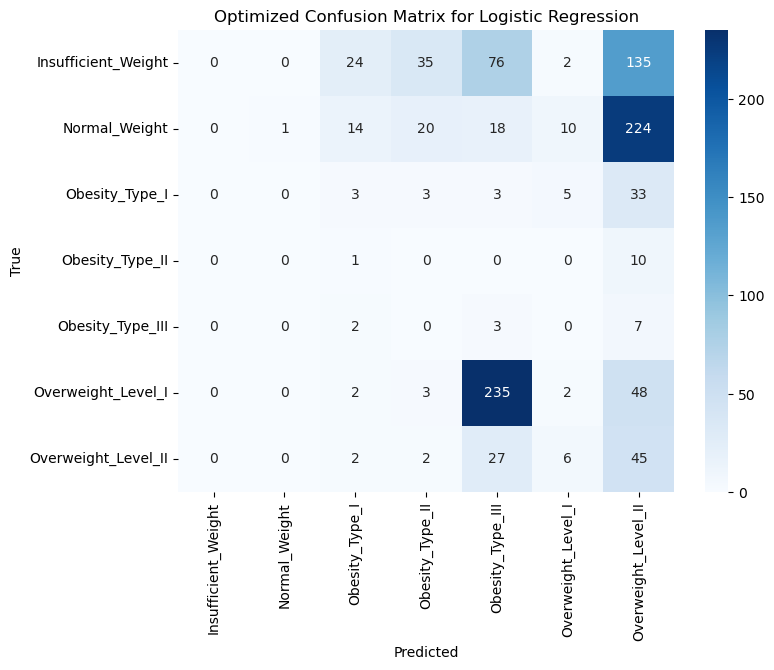

Optimizing Random Forest...
Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Best parameters for Random Forest: {'classifier__max_depth': 30, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Random Forest Optimized Recall: 0.0549
Confusion Matrix for Random Forest:
[[  0   0  10  16  66   4 176]
 [  0   1  45  12  11   6 212]
 [  0   0   8   3   1   3  32]
 [  0   0   0   1   0   0  10]
 [  0   0   0   1   2   0   9]
 [  0   0  15   2 225   2  46]
 [  0   1   9   3  26   2  41]]


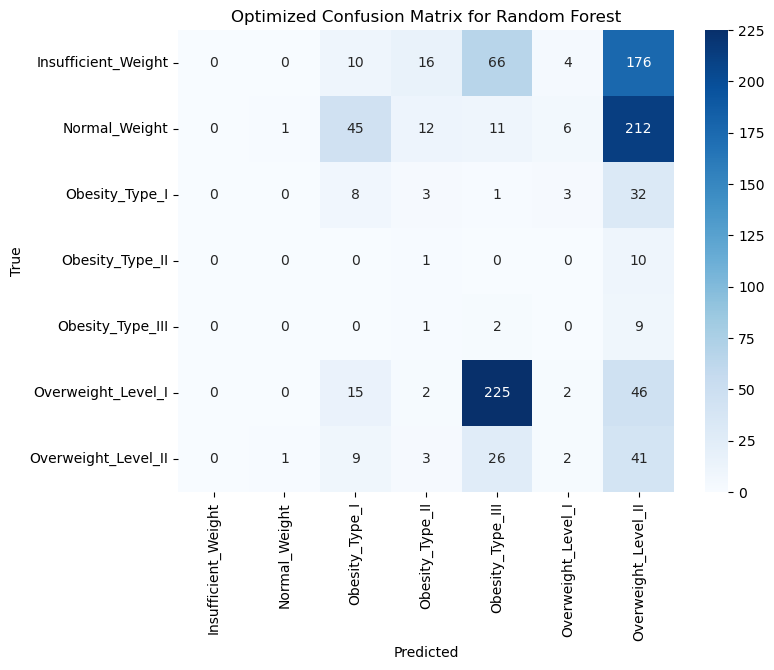

Optimizing KNN...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Best parameters for KNN: {'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
KNN Optimized Recall: 0.0549
Confusion Matrix for KNN:
[[  0   0  30  45  89  18  90]
 [  0   2  66  23  35  26 135]
 [  0   0  14   2   9  10  12]
 [  0   0   2   1   0   0   8]
 [  0   0   1   3   2   0   6]
 [  0   0  31   3 221   7  28]
 [  1   0  13   3  26  10  29]]


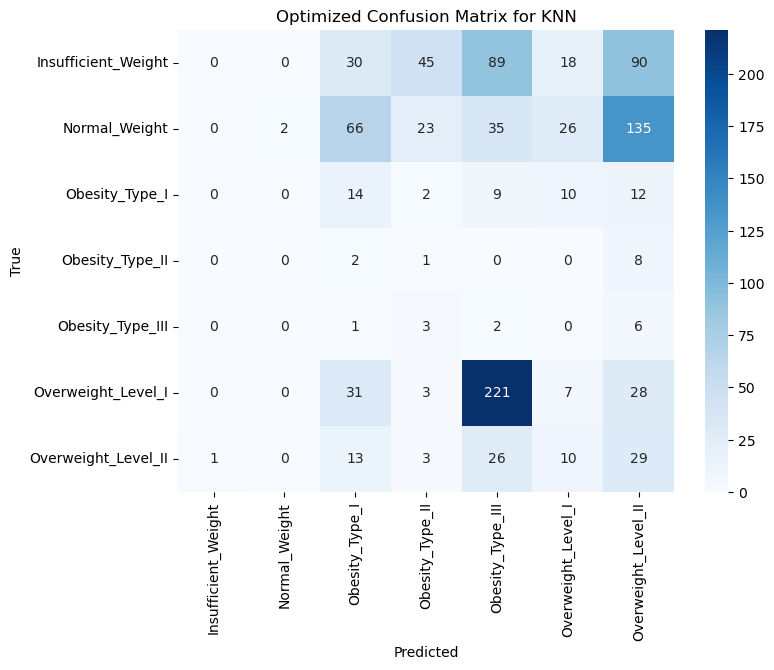

Optimizing SVM...
Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Best parameters for SVM: {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
SVM Optimized Recall: 0.0509
Confusion Matrix for SVM:
[[  0   0  85 108  60   1  18]
 [  0   0 131  58  14   6  78]
 [  0   0  25   7   1   5   9]
 [  0   0   6   2   0   0   3]
 [  0   0   7   2   1   0   2]
 [  0   0  49   9 212   0  20]
 [  0   0  26   9  24   0  23]]


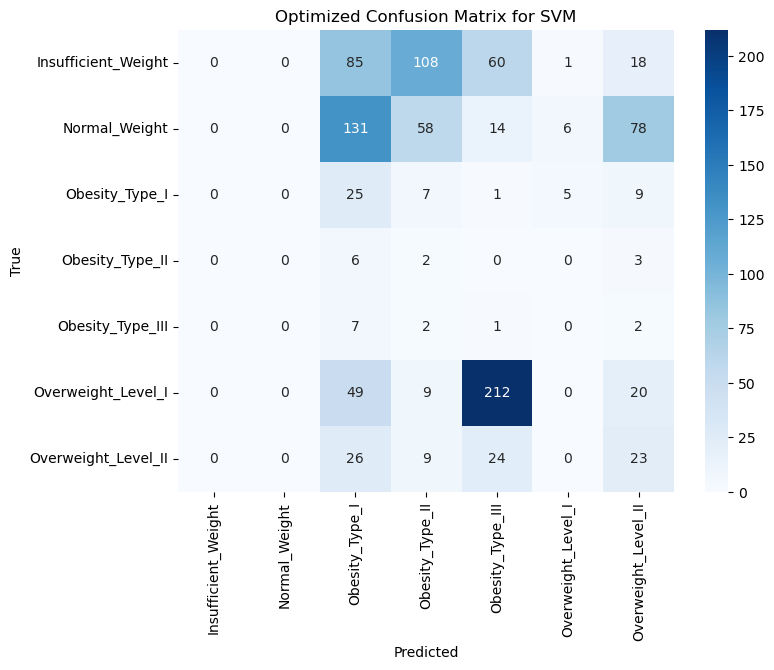

Optimizing XGBoost...
Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Best parameters for XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 200}
XGBoost Optimized Recall: 0.0380
Confusion Matrix for XGBoost:
[[  0   0  64 158  40   3   7]
 [  0   1 123  80  20   3  60]
 [  0   0  17  17   2   1  10]
 [  0   0   4   5   0   0   2]
 [  0   0   5   7   0   0   0]
 [  0   0  40  87 155   1   7]
 [  0   1  25  21  20   1  14]]


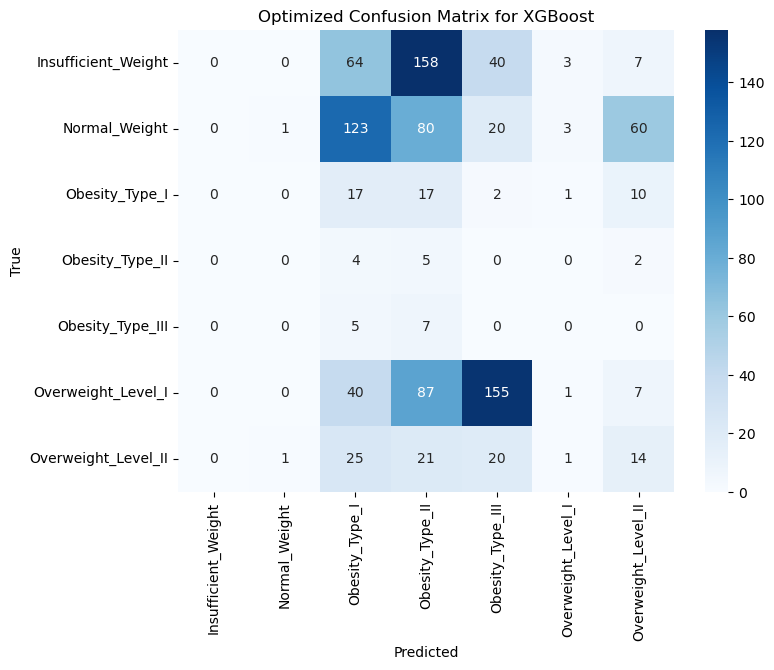

Optimizing LightGBM...
Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\NUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2195
[LightGBM] [Info] Number of data points in the train set: 1110, number of used features: 25
[LightGBM] [Info] Start training from score -1.406313
[LightGBM] [Info] Start training from score -1.352633
[LightGBM] [Info] Start training from score -3.161968
[LightGBM] [Info] Start training from score -4.614220
[LightGBM] [Info] Start training from score -4.527209
[LightGBM] [Info] Start training from score -1.342234
[LightGBM] [Info] Start training from score -1.759842
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

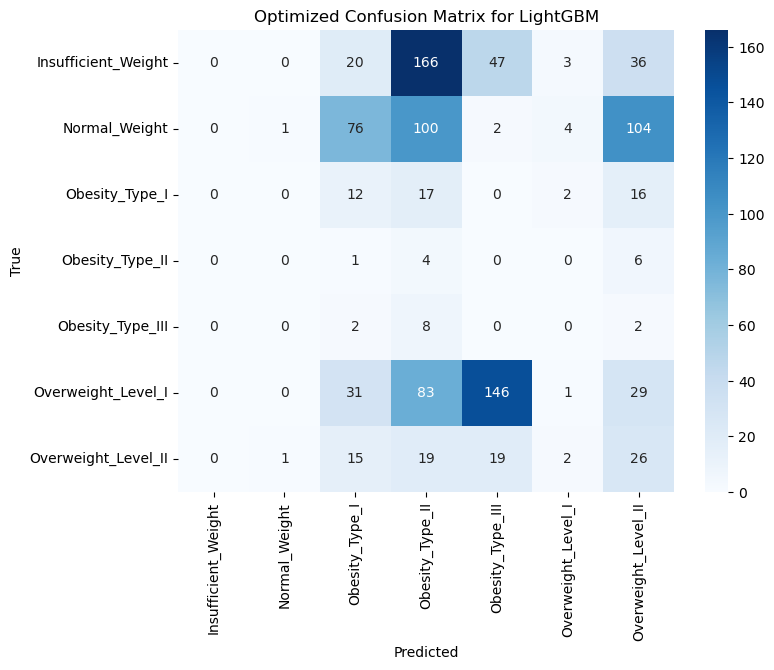

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

# Hiperparametre arama alanları
param_grid = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf', 'poly'],
        'classifier__gamma': ['scale', 'auto']
    },
    'XGBoost': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7]
    },
    'LightGBM': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__num_leaves': [20, 31, 40]
    }
}

# Her model için optimize edilmiş eğitim ve değerlendirme süreci
for model_name, model in models.items():
    print(f"Optimizing {model_name}...")

    # Pipeline oluştur
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # GridSearchCV ile en iyi parametreleri bul
    grid_search = GridSearchCV(
        model_pipeline,
        param_grid[model_name],
        scoring='recall_weighted',  # Recall değerine göre optimize et
        cv=3,  # 3-fold cross-validation
        n_jobs=-1,
        verbose=1
    )

    # GridSearch eğitimi
    grid_search.fit(X_train, y_train)

    # En iyi modeli al
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    # Test verisi ile tahmin yap
    y_pred = best_model.predict(X_test)

    # Recall hesapla
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"{model_name} Optimized Recall: {recall:.4f}")

    # Confusion Matrix hesapla
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:")
    print(cm)

    # Confusion Matrix görselleştir
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Optimized Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
